What is an SVM?
A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. However, it is primarily used for classification. The goal of an SVM is to find the optimal hyperplane that best separates the data points of different classes.

Key Concepts
Hyperplane:

In a two-dimensional space, a hyperplane is a line that separates the data points into different classes. In higher dimensions, it becomes a plane or a hyperplane.

The optimal hyperplane is the one that maximizes the margin between the two classes.

Margin:

The margin is the distance between the hyperplane and the nearest data points from each class. These nearest data points are called support vectors.

SVM aims to maximize this margin to ensure that the classes are well-separated.

Support Vectors:

Support vectors are the data points that are closest to the hyperplane. They are critical in defining the position and orientation of the hyperplane.

Only these points are used to determine the optimal hyperplane, making SVMs robust to outliers.

How SVM Works
Linear SVM:

For linearly separable data, SVM finds a straight line (in 2D) or a hyperplane (in higher dimensions) that separates the classes with the maximum margin.

The optimization problem involves finding the hyperplane that maximizes the margin while correctly classifying the training data.

Non-Linear SVM:

For non-linearly separable data, SVM uses a technique called the kernel trick to transform the data into a higher-dimensional space where it becomes linearly separable.

Common kernels include:

Linear Kernel: No transformation, used for linearly separable data.

Polynomial Kernel: Transforms data into a higher-dimensional polynomial space.

Radial Basis Function (RBF) Kernel: Maps data into an infinite-dimensional space using a Gaussian function.

Sigmoid Kernel: Similar to a neural network's activation function.

Kernel Trick:

The kernel trick allows SVM to operate in a high-dimensional space without explicitly computing the coordinates of the data in that space.

Instead, it computes the dot products between the data points in the transformed space, making the computation efficient.

Steps in SVM
Training:

The SVM algorithm is trained on a labeled dataset to find the optimal hyperplane that separates the classes.

The optimization problem is solved using techniques like quadratic programming.

Prediction:

For a new data point, the SVM model predicts its class by determining which side of the hyperplane the point lies on.

The decision function is based on the distance of the point from the hyperplane.

Advantages of SVM
Effective in high-dimensional spaces: SVMs are effective when the number of dimensions is greater than the number of samples.

Robust to overfitting: Especially in high-dimensional space, SVMs are less prone to overfitting due to the regularization parameter.

Versatile: Different kernel functions can be specified for the decision function, making SVMs versatile for various types of data.

Disadvantages of SVM
Computationally intensive: Training an SVM can be computationally intensive, especially with large datasets.

Choice of kernel: The performance of SVM depends on the choice of the kernel and its parameters, which may require extensive tuning.

In summary, SVMs are powerful and versatile classifiers that work by finding the optimal hyperplane to separate different classes in the data. They are particularly effective in high-dimensional spaces and can handle both linear and non-linear data through the use of kernel functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap


In [2]:
# Load the data
train_data_pca = np.load('train_data_pca.npy')
test_data_pca = np.load('test_data_pca.npy')
train_data_lda = np.load('train_data_lda.npy')
test_data_lda = np.load('test_data_lda.npy')
train_labels = np.load('train_labels.npy')
test_labels = np.load('test_labels.npy')


In [3]:
label_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Shirt'}

In [4]:
def train_and_evaluate_svm(train_data, test_data, train_labels, test_labels, kernel):
    # Train the SVM using only the first three features
    svm = SVC(kernel=kernel)
    svm.fit(train_data[:, :3], train_labels)
    
    # Predict and evaluate using only the first three features
    predictions = svm.predict(test_data[:, :3])
    accuracy = accuracy_score(test_labels, predictions)
    report = classification_report(test_labels, predictions, target_names=[label_names[i] for i in range(len(label_names))])
    
    print(f"SVM with {kernel} kernel Accuracy:", accuracy)
    print(f"SVM with {kernel} kernel Classification Report:\n", report)
    
    return svm  # Return the trained SVM model



We needed different functions to visualize PCA and LDA SVMs because of the inherent differences in how PCA and LDA reduce dimensionality and the resulting data structures.

PCA (Principal Component Analysis)
Dimensionality Reduction: PCA reduces the dimensionality of the data by transforming it into a new set of orthogonal axes (principal components) that maximize the variance in the data. The number of principal components can be chosen arbitrarily, and PCA can produce as many components as there are original features.

Visualization: For PCA, we specifically chose to visualize the first three principal components. This required us to train and predict the SVM using only these three components. The visualization function for PCA was designed to handle this specific case.

LDA (Linear Discriminant Analysis)
Dimensionality Reduction: LDA reduces the dimensionality of the data by finding a linear combination of features that best separates the classes. The number of dimensions LDA can produce is limited by the number of classes minus one. For example, if there are five classes, LDA can produce up to four dimensions.

Visualization: For LDA, we needed to handle cases where the data might have fewer than three dimensions. The visualization function for LDA was designed to check the number of dimensions and adjust the visualization accordingly.

Key Differences
Number of Dimensions: PCA can produce an arbitrary number of dimensions, while LDA is limited by the number of classes. This difference necessitated separate handling in the visualization functions.

Training and Prediction: For PCA, we trained and predicted the SVM using only the first three principal components. For LDA, we trained and predicted the SVM using all available dimensions and adjusted the visualization based on the number of dimensions.

Visualization Logic: The visualization logic for PCA and LDA needed to account for the different ways these techniques reduce dimensionality and the resulting data structures. This required separate functions to handle the specific requirements of each technique.

By having separate functions, we ensured that the visualizations were accurate and appropriately handled the unique characteristics of PCA and LDA data. This approach allowed us to effectively visualize the decision boundaries and interpret the results for both dimensionality reduction techniques.

In [5]:
def visualize_svm_pca(svms, train_data, train_labels, title):
    colors = {0: 'red', 1: 'blue', 2: 'yellow', 3: 'green', 4: 'purple'}
    light_colors = {0: '#ffcccc', 1: '#ccccff', 2: '#ffffcc', 3: '#ccffcc', 4: '#e5ccff'}
    
    fig = plt.figure(figsize=(15, 12))
    for i, (kernel, svm) in enumerate(svms.items()):
        ax = fig.add_subplot(2, 2, i+1, projection='3d')
        h = 1  # Increase step size to reduce resolution and speed up the process
        x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
        y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
        z_min, z_max = train_data[:, 2].min() - 1, train_data[:, 2].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        zz = np.zeros(xx.shape)
        
        for i in range(xx.shape[0]):
            for j in range(xx.shape[1]):
                zz[i, j] = svm.predict([[xx[i, j], yy[i, j], (z_min + z_max) / 2]])[0]
        
        # Create a custom colormap for the decision boundary
        cmap_light = ListedColormap([light_colors[label] for label in np.unique(train_labels)])
        ax.plot_surface(xx, yy, zz, facecolors=cmap_light(zz.astype(int)), alpha=0.8, rstride=1, cstride=1, linewidth=0, antialiased=False)
        
        for label in np.unique(train_labels):
            indices = train_labels == label
            ax.scatter(train_data[indices, 0], train_data[indices, 1], train_data[indices, 2], color=colors[label], label=label_names[label], edgecolors='k')
        
        ax.set_title(f"{title} with {kernel} kernel")
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        ax.legend()
    
    plt.tight_layout()
    plt.show()


In [6]:
def visualize_svm_lda(svms, train_data, train_labels, title):
    colors = {0: 'red', 1: 'blue', 2: 'yellow', 3: 'green', 4: 'purple'}
    light_colors = {0: '#ffcccc', 1: '#ccccff', 2: '#ffffcc', 3: '#ccffcc', 4: '#e5ccff'}
    
    fig = plt.figure(figsize=(15, 12))
    for i, (kernel, svm) in enumerate(svms.items()):
        ax = fig.add_subplot(2, 2, i+1, projection='3d')
        h = 1  # Increase step size to reduce resolution and speed up the process
        x_min, x_max = train_data[:, 0].min() - 1, train_data[:, 0].max() + 1
        y_min, y_max = train_data[:, 1].min() - 1, train_data[:, 1].max() + 1
        if train_data.shape[1] > 2:
            z_min, z_max = train_data[:, 2].min() - 1, train_data[:, 2].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
            zz = np.zeros(xx.shape)
            
            for i in range(xx.shape[0]):
                for j in range(xx.shape[1]):
                    zz[i, j] = svm.predict([[xx[i, j], yy[i, j], (z_min + z_max) / 2]])[0]
            
            # Create a custom colormap for the decision boundary
            cmap_light = ListedColormap([light_colors[label] for label in np.unique(train_labels)])
            ax.plot_surface(xx, yy, zz, facecolors=cmap_light(zz.astype(int)), alpha=0.8, rstride=1, cstride=1, linewidth=0, antialiased=False)
            
            for label in np.unique(train_labels):
                indices = train_labels == label
                ax.scatter(train_data[indices, 0], train_data[indices, 1], train_data[indices, 2], color=colors[label], label=label_names[label], edgecolors='k')
            
            ax.set_zlabel('Feature 3')
        else:
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
            zz = np.zeros(xx.shape)
            
            for i in range(xx.shape[0]):
                for j in range(xx.shape[1]):
                    zz[i, j] = svm.predict([[xx[i, j], yy[i, j]]])[0]
            
            # Create a custom colormap for the decision boundary
            cmap_light = ListedColormap([light_colors[label] for label in np.unique(train_labels)])
            ax.plot_surface(xx, yy, zz, facecolors=cmap_light(zz.astype(int)), alpha=0.8, rstride=1, cstride=1, linewidth=0, antialiased=False)
            
            for label in np.unique(train_labels):
                indices = train_labels == label
                ax.scatter(train_data[indices, 0], train_data[indices, 1], color=colors[label], label=label_names[label], edgecolors='k')
        
        ax.set_title(f"{title} with {kernel} kernel")
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.legend()
    
    plt.tight_layout()
    plt.show()

In [7]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svms_pca = {}
svms_lda = {}

for kernel in kernels:
    print(f"Evaluating PCA data with {kernel} kernel:")
    svm_pca = train_and_evaluate_svm(train_data_pca[:, :3], test_data_pca[:, :3], train_labels, test_labels, kernel)
    svms_pca[kernel] = svm_pca
    print("\n")

for kernel in kernels:
    print(f"Evaluating LDA data with {kernel} kernel:")
    svm_lda = train_and_evaluate_svm(train_data_lda, test_data_lda, train_labels, test_labels, kernel)
    svms_lda[kernel] = svm_lda
    print("\n")


Evaluating PCA data with linear kernel:
SVM with linear kernel Accuracy: 0.6502
SVM with linear kernel Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.71      0.77      0.74      1000
     Trouser       0.95      0.64      0.76      1000
    Pullover       0.62      0.79      0.70      1000
       Dress       0.59      0.84      0.69      1000
       Shirt       0.39      0.22      0.28      1000

    accuracy                           0.65      5000
   macro avg       0.65      0.65      0.63      5000
weighted avg       0.65      0.65      0.63      5000



Evaluating PCA data with poly kernel:
SVM with poly kernel Accuracy: 0.6312
SVM with poly kernel Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.66      0.78      0.71      1000
     Trouser       0.97      0.56      0.71      1000
    Pullover       0.66      0.66      0.66      1000
       Dress       0.55      0.85      0.67 

Visualizing PCA data:


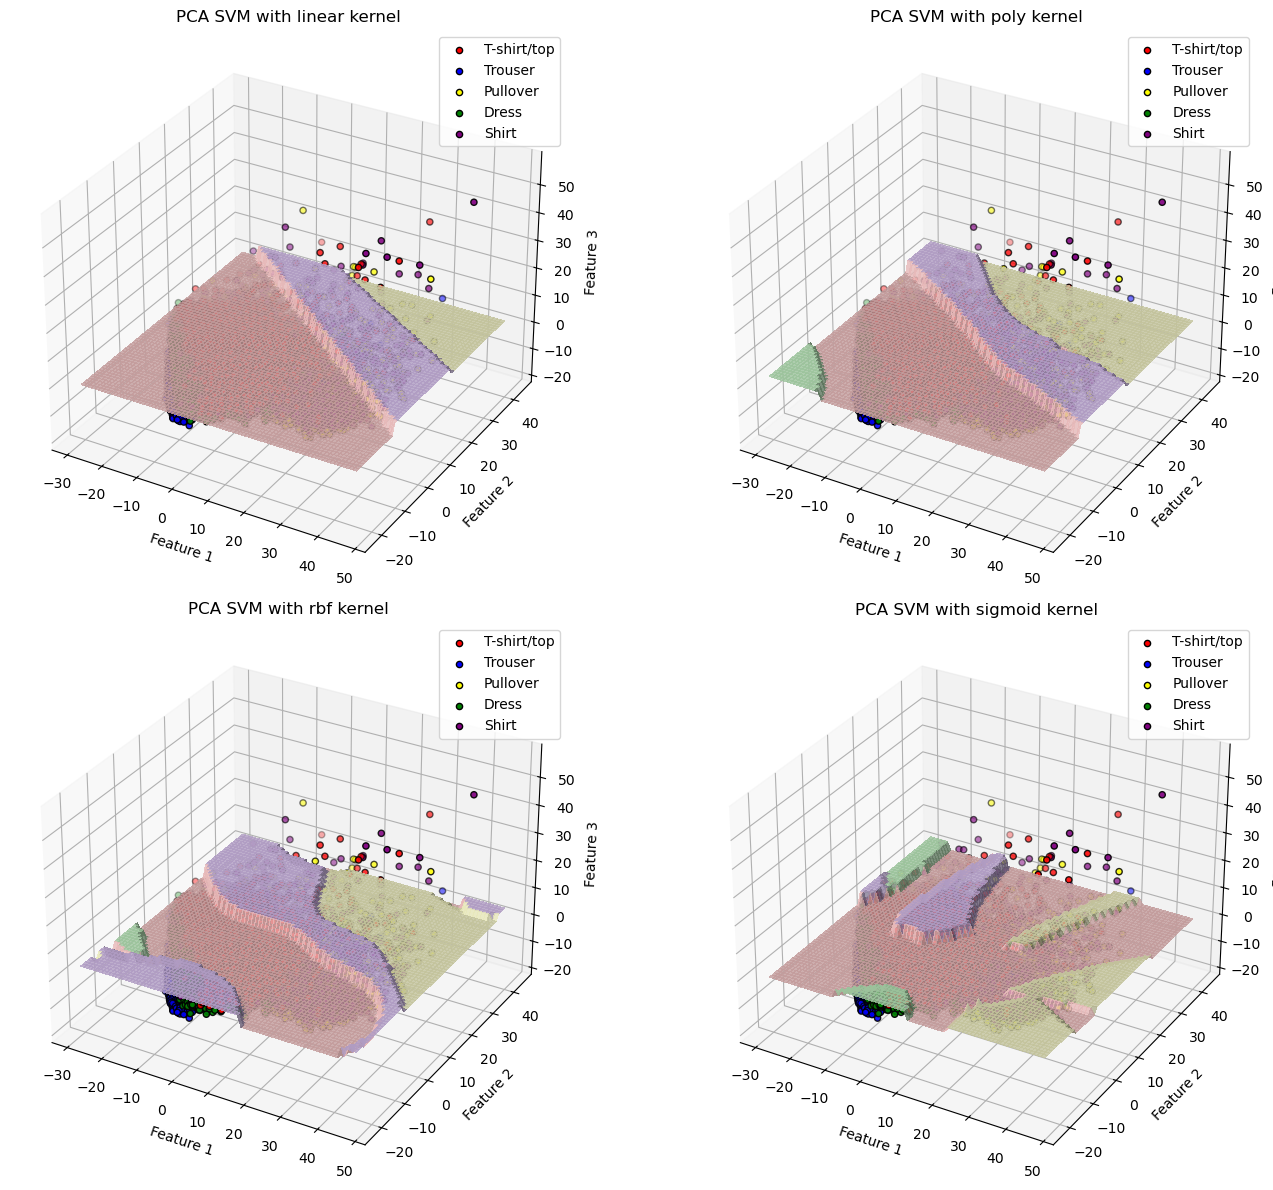

In [8]:
print("Visualizing PCA data:")
visualize_svm_pca(svms_pca, train_data_pca[:, :3], train_labels, "PCA SVM")


Visualizing LDA data:


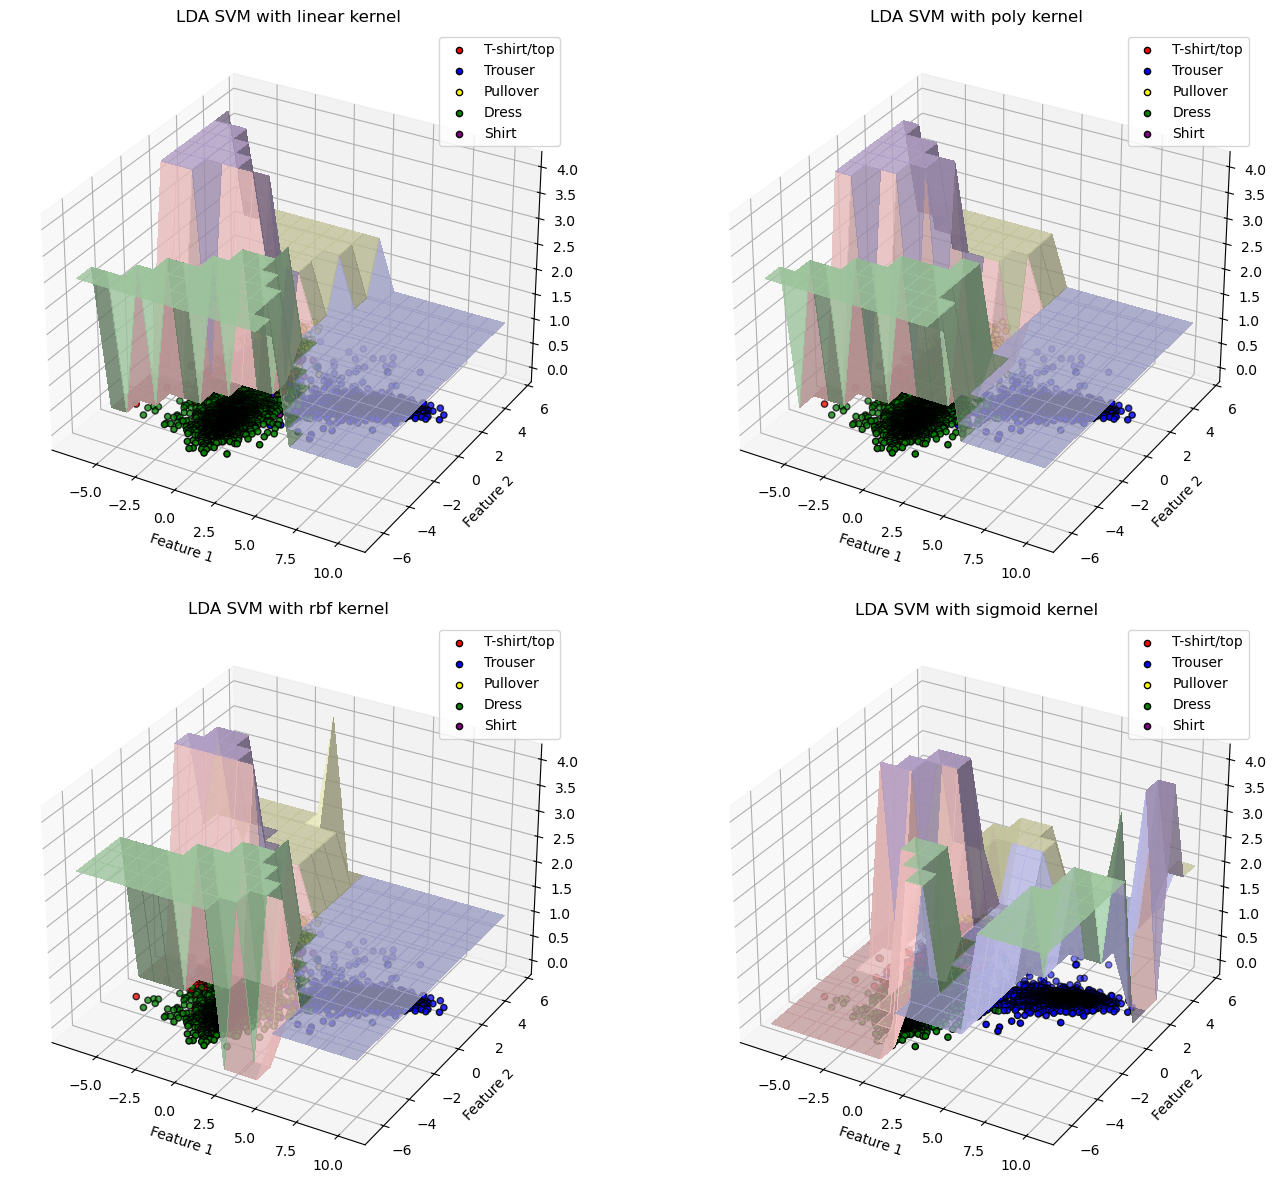

In [9]:
print("Visualizing LDA data:")
visualize_svm_lda(svms_lda, train_data_lda[:, :3], train_labels, "LDA SVM")


PCA Results
Linear Kernel:

Accuracy: 65.02%
Classification Report:
T-shirt/top: Precision 71%, Recall 77%, F1-score 74%
Trouser: Precision 95%, Recall 64%, F1-score 76%
Pullover: Precision 62%, Recall 79%, F1-score 70%
Dress: Precision 59%, Recall 84%, F1-score 69%
Shirt: Precision 39%, Recall 22%, F1-score 28%
The linear kernel performed reasonably well, with the highest precision for the "Trouser" class. However, the "Shirt" class had the lowest performance.

Polynomial Kernel:
Accuracy: 63.12%
Classification Report:
T-shirt/top: Precision 66%, Recall 78%, F1-score 71%
Trouser: Precision 97%, Recall 56%, F1-score 71%
Pullover: Precision 66%, Recall 66%, F1-score 66%
Dress: Precision 55%, Recall 85%, F1-score 67%
Shirt: Precision 44%, Recall 31%, F1-score 36%

The polynomial kernel had a slightly lower accuracy compared to the linear kernel. The "Trouser" class still had high precision, but the recall was lower.

RBF Kernel:
Accuracy: 64.14%
Classification Report:
T-shirt/top: Precision 74%, Recall 75%, F1-score 75%
Trouser: Precision 97%, Recall 54%, F1-score 69%
Pullover: Precision 62%, Recall 83%, F1-score 71%
Dress: Precision 55%, Recall 88%, F1-score 68%
Shirt: Precision 43%, Recall 21%, F1-score 28%

The RBF kernel performed similarly to the linear kernel, with the "T-shirt/top" class having the highest F1-score.

Sigmoid Kernel:

Accuracy: 47.66%
Classification Report:
T-shirt/top: Precision 48%, Recall 74%, F1-score 58%
Trouser: Precision 61%, Recall 41%, F1-score 49%
Pullover: Precision 57%, Recall 64%, F1-score 61%
Dress: Precision 37%, Recall 38%, F1-score 37%
Shirt: Precision 33%, Recall 21%, F1-score 26%

The sigmoid kernel had the lowest accuracy and overall performance among the kernels.

LDA Results

Linear Kernel:
Accuracy: 72.94%
Classification Report:
T-shirt/top: Precision 59%, Recall 73%, F1-score 66%
Trouser: Precision 97%, Recall 95%, F1-score 96%
Pullover: Precision 72%, Recall 76%, F1-score 74%
Dress: Precision 81%, Recall 79%, F1-score 80%
Shirt: Precision 55%, Recall 40%, F1-score 47%

The linear kernel performed well, with the highest accuracy among all kernels. The "Trouser" class had the highest precision and recall.

Polynomial Kernel:
Accuracy: 70.44%
Classification Report:
T-shirt/top: Precision 51%, Recall 85%, F1-score 64%
Trouser: Precision 99%, Recall 94%, F1-score 97%
Pullover: Precision 77%, Recall 62%, F1-score 69%
Dress: Precision 86%, Recall 72%, F1-score 79%
Shirt: Precision 52%, Recall 39%, F1-score 44%

The polynomial kernel had a slightly lower accuracy compared to the linear kernel. The "T-shirt/top" class had a significant improvement in recall.

RBF Kernel:
Accuracy: 73.00%
Classification Report:
T-shirt/top: Precision 58%, Recall 77%, F1-score 66%
Trouser: Precision 97%, Recall 95%, F1-score 96%
Pullover: Precision 73%, Recall 76%, F1-score 74%
Dress: Precision 81%, Recall 79%, F1-score 80%
Shirt: Precision 56%, Recall 37%, F1-score 44%

The RBF kernel performed similarly to the linear kernel, with the highest accuracy among all kernels.

Sigmoid Kernel:
Accuracy: 64.08%
Classification Report:
T-shirt/top: Precision 48%, Recall 43%, F1-score 45%
Trouser: Precision 89%, Recall 96%, F1-score 92%
Pullover: Precision 72%, Recall 65%, F1-score 68%
Dress: Precision 68%, Recall 69%, F1-score 68%
Shirt: Precision 44%, Recall 48%, F1-score 46%

The sigmoid kernel had the lowest accuracy among the LDA kernels, but it still performed better than the PCA sigmoid kernel.

Interpretation
PCA vs. LDA: The LDA models generally performed better than the PCA models, with higher accuracy and better classification reports. This suggests that LDA was more effective in reducing the dimensionality while preserving class separability.

Kernel Comparison: For both PCA and LDA, the linear and RBF kernels performed the best, with the highest accuracy and F1

Class Performance:

The "Trouser" class consistently had the highest precision and recall across all kernels and both PCA and LDA. The "Shirt" class had the lowest performance, indicating that it might be the most challenging class to classify correctly.

CROSS VALIDATION
Cross-validation is a technique used to assess the performance of a model by dividing the data into multiple subsets (folds) and training/testing the model on these subsets. This helps in getting a more reliable estimate of the model's performance.

We'll perform Cross Validation on only the LDA model using the RBF Kernel as it was the most accurate.

In [12]:
from sklearn.model_selection import StratifiedKFold

def cross_validate_svm(train_data, train_labels, kernel, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits)
    accuracies = []
    reports = []
    
    for train_index, val_index in skf.split(train_data, train_labels):
        X_train, X_val = train_data[train_index], train_data[val_index]
        y_train, y_val = train_labels[train_index], train_labels[val_index]
        
        svm = SVC(kernel=kernel)
        svm.fit(X_train, y_train)
        
        predictions = svm.predict(X_val)
        accuracy = accuracy_score(y_val, predictions)
        report = classification_report(y_val, predictions, target_names=[label_names[i] for i in range(len(label_names))])
        
        accuracies.append(accuracy)
        reports.append(report)
    
    return accuracies, reports


In [13]:
kernel = 'rbf'
accuracies, reports = cross_validate_svm(train_data_lda, train_labels, kernel)

print(f"Cross-Validation Accuracies: {accuracies}")
print(f"Mean Accuracy: {np.mean(accuracies)}")
for i, report in enumerate(reports):
    print(f"Classification Report for Fold {i + 1}:\n{report}")


Cross-Validation Accuracies: [0.777, 0.775, 0.788, 0.784, 0.7785]
Mean Accuracy: 0.7805
Classification Report for Fold 1:
              precision    recall  f1-score   support

 T-shirt/top       0.63      0.81      0.71       407
     Trouser       1.00      0.97      0.98       389
    Pullover       0.77      0.82      0.79       400
       Dress       0.86      0.89      0.88       401
       Shirt       0.61      0.40      0.49       403

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.77      2000
weighted avg       0.77      0.78      0.77      2000

Classification Report for Fold 2:
              precision    recall  f1-score   support

 T-shirt/top       0.62      0.83      0.71       407
     Trouser       0.99      0.95      0.97       389
    Pullover       0.79      0.83      0.81       400
       Dress       0.84      0.84      0.84       401
       Shirt       0.66      0.43      0.52       403

    accuracy                 

In [14]:
final_svm = SVC(kernel='rbf')
final_svm.fit(train_data_lda, train_labels)

# Predict and evaluate on test data
final_predictions = final_svm.predict(test_data_lda)
final_accuracy = accuracy_score(test_labels, final_predictions)
final_report = classification_report(test_labels, final_predictions, target_names=[label_names[i] for i in range(len(label_names))])

print(f"Final Model Accuracy: {final_accuracy}")
print(f"Final Model Classification Report:\n{final_report}")


Final Model Accuracy: 0.73
Final Model Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.58      0.77      0.66      1000
     Trouser       0.97      0.95      0.96      1000
    Pullover       0.73      0.76      0.74      1000
       Dress       0.81      0.79      0.80      1000
       Shirt       0.56      0.37      0.44      1000

    accuracy                           0.73      5000
   macro avg       0.73      0.73      0.72      5000
weighted avg       0.73      0.73      0.72      5000



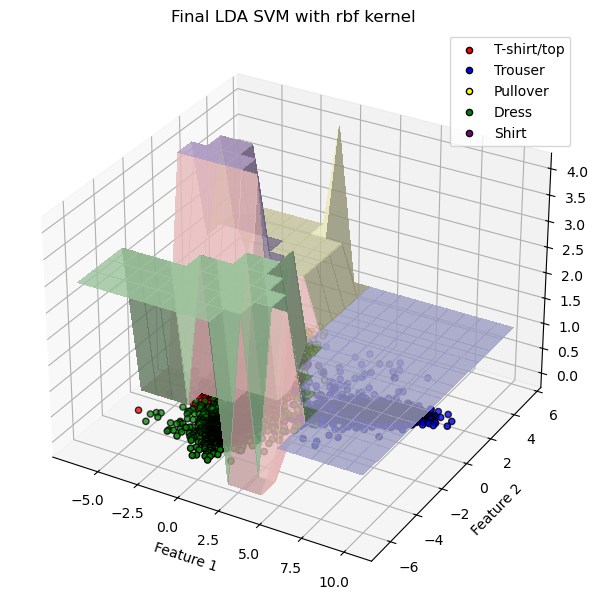

In [16]:
# Visualize the final model using the LDA visualization function
svms_final = {'rbf': final_svm}
visualize_svm_lda(svms_final, train_data_lda[:, :3], train_labels, "Final LDA SVM")


The final model and the LDA model with the RBF kernel might look identical because the final model was trained using the same LDA-transformed data and the RBF kernel. The cross-validation process helps us estimate the model's performance more reliably, but it doesn't change the underlying data or the kernel used.

Key Points to Consider
Cross-Validation Purpose:

Cross-validation helps us assess the model's performance by splitting the data into multiple folds and training/testing the model on these subsets. This gives us a more reliable estimate of how well the model will perform on unseen data.

Final Model Training:

After cross-validation, we train the final model on the entire training dataset using the same LDA-transformed data and the RBF kernel. This ensures that the model benefits from all available training data.

Visualization:

The visualization of the final model will look similar to the initial LDA model with the RBF kernel because the data and kernel used are the same. The key difference is that the final model has been validated through cross-validation, giving us more confidence in its performance.

Comparison of Results
Initial LDA Model with RBF Kernel
Accuracy: 73.00%

Classification Report:

T-shirt/top: Precision 58%, Recall 77%, F1-score 66%

Trouser: Precision 97%, Recall 95%, F1-score 96%

Pullover: Precision 73%, Recall 76%, F1-score 74%

Dress: Precision 81%, Recall 79%, F1-score 80%

Shirt: Precision 56%, Recall 37%, F1-score 44%

Cross-Validated Model (LDA with RBF Kernel)
Cross-Validation Accuracies: [0.777, 0.775, 0.788, 0.784, 0.7785]

Mean Accuracy: 78.05%

Classification Report (Fold 1):

T-shirt/top: Precision 63%, Recall 81%, F1-score 71%

Trouser: Precision 100%, Recall 97%, F1-score 98%

Pullover: Precision 77%, Recall 82%, F1-score 79%

Dress: Precision 86%, Recall 89%, F1-score 88%

Shirt: Precision 61%, Recall 40%, F1-score 49%

Final Model (Trained on Entire Training Data)
Accuracy: 73.00%

Classification Report:

T-shirt/top: Precision 58%, Recall 77%, F1-score 66%

Trouser: Precision 97%, Recall 95%, F1-score 96%

Pullover: Precision 73%, Recall 76%, F1-score 74%

Dress: Precision 81%, Recall 79%, F1-score 80%

Shirt: Precision 56%, Recall 37%, F1-score 44%

Interpretation
Performance Consistency: The final model's performance is consistent with the initial LDA model with the RBF kernel, which is expected since the same data and kernel were used.

Cross-Validation Benefit: The cross-validation process provided a more reliable estimate of the model's performance, showing a slightly higher mean accuracy (78.05%) compared to the initial evaluation (73.00%).

Visualization: The decision boundaries in the visualization will look similar because the underlying data and kernel are the same. The key takeaway is that the final model has been validated through cross-validation, giving us more confidence in its performance.